In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy import integrate


In [2]:
#assume the initial distribution for p,l,g is
#p~beta(2,12),l~(10,65),g~(10,75)
p0=np.random.beta(2,12)
l0=np.random.beta(10,65)
g0=np.random.beta(10,75)
true_value=np.array([p0,l0,g0])
true_value

array([0.04382186, 0.16447982, 0.12513288])

In [3]:
def generator(sample,n,Tvalue):
    p=sample[0]
    l=sample[1]
    g=sample[2]
    s=np.random.binomial(n,Tvalue[0])
    p=-Tvalue[1]*p**2+(Tvalue[1]-Tvalue[2]+1)*p
    return np.array([p,l,g]),s
#generator(sample0,100)

In [4]:
#K=100000

def belief_update(s_t,Cbelief,n_t,K,Tvalue):
    Nbelief=[]
    while len(Nbelief)<K:
        samp=Cbelief[np.random.randint(0,K-1)]
        s=generator(samp,n_t,Tvalue)     
        if s_t==s[1]:
            #print(s)
            Nbelief.append(generator(samp,n_t,Tvalue)[0])
    return Nbelief

    

[0.043821863622335054, 0.04523026003544619, 0.04667344336323967, 0.048151595938336206, 0.04966485483429132, 0.05121330926696258, 0.05279699803165581, 0.054415906992751506, 0.056069966643418026, 0.057759049753831254, 0.0594829691270238, 0.06124147548206002, 0.06303425548465824, 0.06486092994563865, 0.0667210522076477, 0.06861410674047909, 0.07053950796496343, 0.07249659932481907, 0.07448465262503558, 0.07650286765429, 0.07855037210756988, 0.08062622182359597, 0.08272940134980387, 0.08485882484556527, 0.08701333733201842, 0.08919171629435113, 0.09139267363965774, 0.09361485801060294, 0.09585685745209825, 0.09811720242506715, 0.10039436915818081, 0.10268678332522839, 0.10499282403258865, 0.10731082809813858, 0.10963909459991455, 0.11197588966998086, 0.11431945150630103, 0.11666799557299522, 0.11901971995723891, 0.12137281084925318, 0.12372544811038305, 0.1260758108931862, 0.12842208327677718, 0.13076245988040652, 0.13309515141840395, 0.13541839016018167, 0.13773043525996587, 0.14002957792

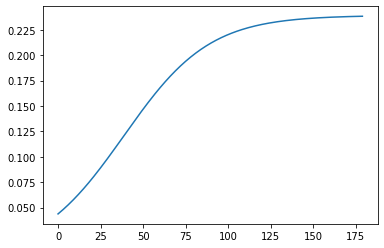

In [5]:
#update true_value p
def update_Tvalue(Tvalue):
    p=-Tvalue[1]*(Tvalue[0]**2)+(Tvalue[1]-Tvalue[2]+1)*Tvalue[0]
    l=Tvalue[1]
    g=Tvalue[2]
    return np.array([p,l,g])

T=180
Tvalue=[]
Tvalue.append(true_value)
for i in range(T-1):
    TT=update_Tvalue(Tvalue[i])
    Tvalue.append(TT)
#print(P)

x=np.linspace(0,T-1,T)
P=[]
for i in range(T):
    P.append(Tvalue[i][0])    
plt.plot(x,P)
print(P)

Text(0.5, 1.0, 'gamma,T=0')

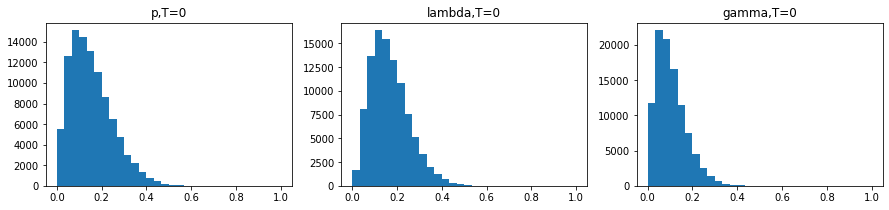

In [6]:
#first step update
K=100000
b0=[]
for i in range(K):
    p=np.random.beta(2,11)
    l=np.random.beta(3,15)
    g=np.random.beta(2,17)
    b0.append([p,l,g])
#print(a)
#s_t=np.random.binomial(n_t,Tvalue[0])
n_t=100
s_t=np.random.binomial(n_t,true_value[0])
b1=belief_update(s_t,b0,n_t,K,true_value)
#print(b1)


y0=[]
y1=[]
y2=[]
for i in range (K):
    y0.append(b1[i][0])
    y1.append(b1[i][1])
    y2.append(b1[i][2])
    
#print(y)
fig,axs = plt.subplots(1, 3,figsize=(15,3))
axs[0].hist(y0,bins=30,range=(0,1))
axs[0].set_title("p,T=0")
axs[1].hist(y1,bins=30,range=(0,1))
axs[1].set_title("lambda,T=0")
axs[2].hist(y2,bins=30,range=(0,1))
axs[2].set_title("gamma,T=0")





In [7]:
#generate n_t, s_t for testing
n=[100 for i in range (T)]
s=[]
for i in range (T):
    #print(p)
    ss=np.random.binomial(n[i],P[i])
    s.append(ss)

In [8]:
Belief=[]
Belief.append(b0)
for i in range (T-1):
    b_new=belief_update(s[i],Belief[i],n[i],K,Tvalue[i])    
    Belief.append(b_new)
    

1.9861052608024838 10.90845102892946
3.021157310264282 15.077189643317551
2.0206049801869077 17.177762895100248


Text(0.5, 1.0, 'gamma,T=0')

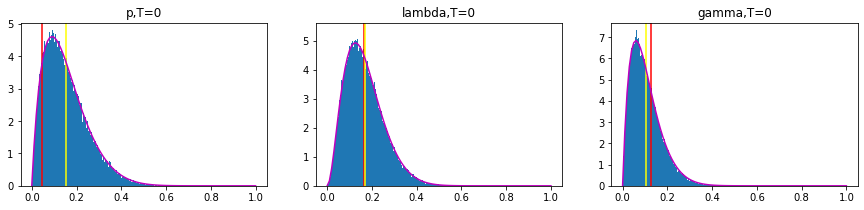

In [9]:
#plot initial belief
p_0=[]
l_0=[]
g_0=[]
for i in range (K):
    p_0.append(Belief[0][i][0])
    l_0.append(Belief[0][i][1])
    g_0.append(Belief[0][i][2])
    
#print(y)

#beta_fit testing for T=0
#initial p~beta(2,12),l~(10,65),g~(10,75)
a1_0,b1_0=beta.fit(p_0,floc=0,fscale=1)[0:2]
a2_0,b2_0=beta.fit(l_0,floc=0,fscale=1)[0:2]
a3_0,b3_0=beta.fit(g_0,floc=0,fscale=1)[0:2]
print(a1_0,b1_0)
print(a2_0,b2_0)
print(a3_0,b3_0)

#blue area is the density histogram of the current belief
#red vertical line is the true value for p,l,g
#yellow vertical line is the fitted beta mean of the current belief
#purple line is the pdf plot of the fitted beta distributions
x=np.linspace(0,1,101)
fig,axs = plt.subplots(1, 3,figsize=(15,3),)
axs[0].hist(p_0,bins=500,density=True,range=(0,1))
axs[0].axvline(P[0],color="red")
axs[0].set_title("p,T=0")
axs[0].axvline(a1_0/(a1_0+b1_0),color="yellow")
axs[0].plot(x,beta.pdf(x,a1_0,b1_0),color="m")
axs[1].hist(l_0,bins=500,density=True,range=(0,1))
axs[1].axvline(l0,color="red")
axs[1].axvline(a2_0/(a2_0+b2_0),color="yellow")
axs[1].plot(x,beta.pdf(x,a2_0,b2_0),color="m")
axs[1].set_title("lambda,T=0")
axs[2].hist(g_0,bins=500,density=True,range=(0,1))
axs[2].axvline(g0,color="red")
axs[2].axvline(a3_0/(a3_0+b3_0),color="yellow")
axs[2].plot(x,beta.pdf(x,a3_0,b3_0),color="m")
axs[2].set_title("gamma,T=0")





2.0722811233564635 11.33928762451991
3.023103513078356 15.101607867029275
2.0177675421637264 17.214366665252655


Text(0.5, 1.0, 'gamma,T=1')

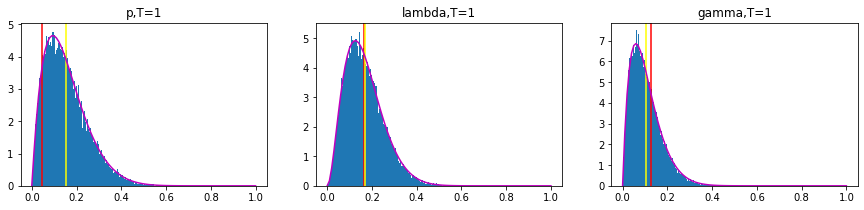

In [10]:
#plot belif at T=1
p_1=[]
l_1=[]
g_1=[]
for i in range (K):
    p_1.append(Belief[1][i][0])
    l_1.append(Belief[1][i][1])
    g_1.append(Belief[1][i][2])

#beta_fit for T=1
a1_1,b1_1=beta.fit(p_1,floc=0,fscale=1)[0:2]
a2_1,b2_1=beta.fit(l_1,floc=0,fscale=1)[0:2]
a3_1,b3_1=beta.fit(g_1,floc=0,fscale=1)[0:2]
print(a1_1,b1_1)
print(a2_1,b2_1)
print(a3_1,b3_1)

#blue area is the density histogram of the current belief
#red vertical line is the true value for p,l,g
#yellow vertical line is the fitted beta mean of the current belief
#purple line is the pdf plot of the fitted beta distributions
x=np.linspace(0,1,101)
fig,axs = plt.subplots(1, 3,figsize=(15,3),)
axs[0].hist(p_1,bins=500,density=True,range=(0,1))
axs[0].axvline(P[1],color="red")
axs[0].axvline(a1_1/(a1_1+b1_1),color="yellow")
axs[0].set_title("p,T=1")
axs[0].plot(x,beta.pdf(x,a1_1,b1_1),color="m")
axs[1].hist(l_1,bins=500,density=True,range=(0,1))
axs[1].axvline(l0,color="red")
axs[1].axvline(a2_1/(a2_1+b2_1),color="yellow")
axs[1].plot(x,beta.pdf(x,a2_1,b2_1),color="m")
axs[1].set_title("lambda,T=1")
axs[2].hist(g_1,bins=500,density=True,range=(0,1))
axs[2].axvline(g0,color="red")
axs[2].axvline(a3_1/(a3_1+b3_1),color="yellow")
axs[2].plot(x,beta.pdf(x,a3_1,b3_1),color="m")
axs[2].set_title("gamma,T=1")


4.286052742083143 20.561136564274992
2.9835987543250373 14.647739319350373
1.9921647363693333 16.847643495755563


Text(0.5, 1.0, 'gamma,T=20')

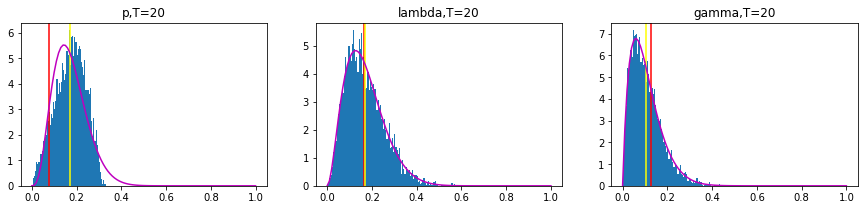

In [11]:
p_20=[]
l_20=[]
g_20=[]
for i in range (K):
    p_20.append(Belief[20][i][0])
    l_20.append(Belief[20][i][1])
    g_20.append(Belief[20][i][2])

#beta_fit for T=20
a1_20,b1_20=beta.fit(p_20,floc=0,fscale=1)[0:2]
a2_20,b2_20=beta.fit(l_20,floc=0,fscale=1)[0:2]
a3_20,b3_20=beta.fit(g_20,floc=0,fscale=1)[0:2]
print(a1_20,b1_20)
print(a2_20,b2_20)
print(a3_20,b3_20)
#print(y)

x=np.linspace(0,1,101)
fig,axs = plt.subplots(1, 3,figsize=(15,3),)
axs[0].hist(p_20,bins=200,density=True,range=(0,1))
axs[0].axvline(P[20],color="red")
axs[0].axvline(a1_20/(a1_20+b1_20),color="yellow")
axs[0].plot(x,beta.pdf(x,a1_20,b1_20),color="m")
axs[0].set_title("p,T=20")
axs[1].hist(l_20,bins=200,density=True,range=(0,1))
axs[1].axvline(l0,color="red")
axs[1].axvline(a2_20/(a2_20+b2_20),color="yellow")
axs[1].plot(x,beta.pdf(x,a2_20,b2_20),color="m")
axs[1].set_title("lambda,T=20")
axs[2].hist(g_20,bins=200,density=True,range=(0,1))
axs[2].axvline(g0,color="red")
axs[2].axvline(a3_20/(a3_20+b3_20),color="yellow")
axs[2].plot(x,beta.pdf(x,a3_20,b3_20),color="m")
axs[2].set_title("gamma,T=20")



8.849515786600957 36.70425889156026
2.9635203939736434 14.656308012214867
1.9738470439775457 16.68222394775334


Text(0.5, 1.0, 'gamma,T=40')

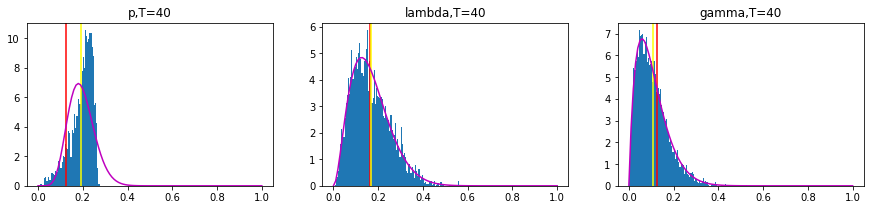

In [12]:
p_40=[]
l_40=[]
g_40=[]
for i in range (K):
    p_40.append(Belief[40][i][0])
    l_40.append(Belief[40][i][1])
    g_40.append(Belief[40][i][2])
    
#print(y)
#beta_fit for T=40
a1_40,b1_40=beta.fit(p_40,floc=0,fscale=1)[0:2]
a2_40,b2_40=beta.fit(l_40,floc=0,fscale=1)[0:2]
a3_40,b3_40=beta.fit(g_40,floc=0,fscale=1)[0:2]
print(a1_40,b1_40)
print(a2_40,b2_40)
print(a3_40,b3_40)

x=np.linspace(0,1,101)
fig,axs = plt.subplots(1, 3,figsize=(15,3),)
axs[0].hist(p_40,bins=200,density=True,range=(0,1))
axs[0].axvline(P[40],color="red")
axs[0].axvline(a1_40/(a1_40+b1_40),color="yellow")
axs[0].plot(x,beta.pdf(x,a1_40,b1_40),color="m")
axs[0].set_title("p,T=40")
axs[1].hist(l_40,bins=200,density=True,range=(0,1))
axs[1].axvline(l0,color="red")
axs[1].axvline(a2_40/(a2_40+b2_40),color="yellow")
axs[1].plot(x,beta.pdf(x,a2_40,b2_40),color="m")
axs[1].set_title("lambda,T=40")
axs[2].hist(g_20,bins=200,density=True,range=(0,1))
axs[2].axvline(g0,color="red")
axs[2].axvline(a3_40/(a3_40+b3_40),color="yellow")
axs[2].plot(x,beta.pdf(x,a3_40,b3_40),color="m")
axs[2].set_title("gamma,T=40")



Text(0.5, 1.0, 'gamma,T=60')

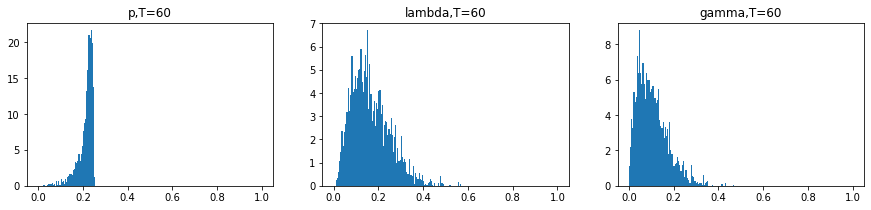

In [13]:
p_60=[]
l_60=[]
g_60=[]
for i in range (K):
    p_60.append(Belief[60][i][0])
    l_60.append(Belief[60][i][1])
    g_60.append(Belief[60][i][2])
    
#print(y)
fig,axs = plt.subplots(1, 3,figsize=(15,3),)
axs[0].hist(p_60,bins=200,density=True,range=(0,1))
axs[0].set_title("p,T=60")
axs[1].hist(l_60,bins=200,density=True,range=(0,1))
axs[1].set_title("lambda,T=60")
axs[2].hist(g_60,bins=200,density=True,range=(0,1))
axs[2].set_title("gamma,T=60")

55.60440543545467 192.3659970857916
3.0799308028822394 15.19737320146107
1.9561972864533528 16.798026081294427


Text(0.5, 1.0, 'gamma,T=80')

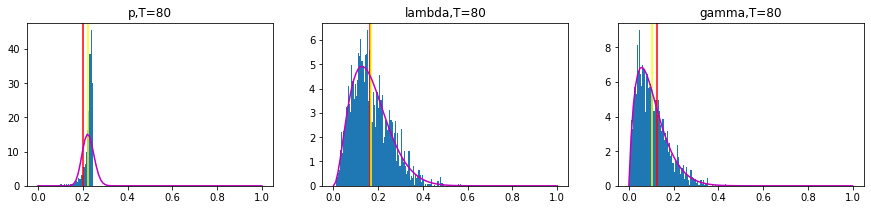

In [14]:
p_80=[]
l_80=[]
g_80=[]
for i in range (K):
    p_80.append(Belief[80][i][0])
    l_80.append(Belief[80][i][1])
    g_80.append(Belief[80][i][2])
    
#print(y)
#beta_fit testing for T=80
a1_80,b1_80=beta.fit(p_80,floc=0,fscale=1)[0:2]
a2_80,b2_80=beta.fit(l_80,floc=0,fscale=1)[0:2]
a3_80,b3_80=beta.fit(g_80,floc=0,fscale=1)[0:2]
print(a1_80,b1_80)
print(a2_80,b2_80)
print(a3_80,b3_80)

x=np.linspace(0,1,101)
fig,axs = plt.subplots(1, 3,figsize=(15,3))
axs[0].hist(p_80,bins=200,density=True,range=(0,1))
axs[0].axvline(P[80],color="red")
axs[0].axvline(a1_80/(a1_80+b1_80),color="yellow")
axs[0].plot(x,beta.pdf(x,a1_80,b1_80),color="m")
axs[0].set_title("p,T=80")
axs[1].hist(l_80,bins=200,density=True,range=(0,1))
axs[1].axvline(l0,color="red")
axs[1].axvline(a2_80/(a2_80+b2_80),color="yellow")
axs[1].plot(x,beta.pdf(x,a2_80,b2_80),color="m")
axs[1].set_title("lambda,T=80")
axs[2].hist(g_80,bins=200,density=True,range=(0,1))
axs[2].axvline(g0,color="red")
axs[2].axvline(a3_80/(a3_80+b3_80),color="yellow")
axs[2].plot(x,beta.pdf(x,a3_80,b3_80),color="m")
axs[2].set_title("gamma,T=80")


Text(0.5, 1.0, 'gamma,T=100')

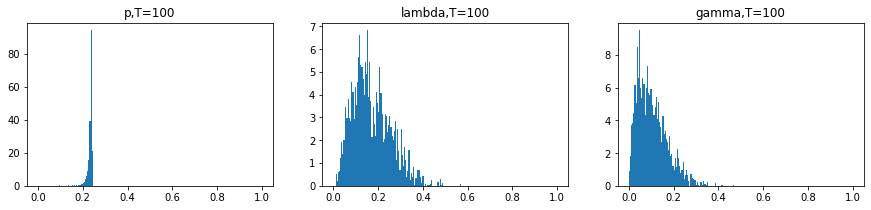

In [15]:
p_100=[]
l_100=[]
g_100=[]
for i in range (K):
    p_100.append(Belief[100][i][0])
    l_100.append(Belief[100][i][1])
    g_100.append(Belief[100][i][2])
#print(y)

fig,axs = plt.subplots(1, 3,figsize=(15,3),)
axs[0].hist(p_100,bins=200,density=True,range=(0,1))
axs[0].set_title("p,T=100")
axs[1].hist(l_100,bins=200,density=True,range=(0,1))
axs[1].set_title("lambda,T=100")
axs[2].hist(g_100,bins=200,density=True,range=(0,1))
axs[2].set_title("gamma,T=100")

473.49422231803305 1538.9259489699245
3.08467512841714 14.981842058274648
1.9697688575006336 17.13553892987424


Text(0.5, 1.0, 'gamma,T=119')

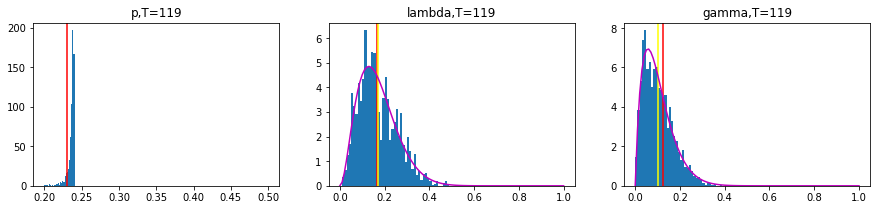

In [16]:
p_119=[]
l_119=[]
g_119=[]
for i in range (K):
    p_119.append(Belief[119][i][0])
    l_119.append(Belief[119][i][1])
    g_119.append(Belief[119][i][2])
    
#beta_fit testing for T=119
a1_119,b1_119=beta.fit(p_119,floc=0,fscale=1)[0:2]
a2_119,b2_119=beta.fit(l_119,floc=0,fscale=1)[0:2]
a3_119,b3_119=beta.fit(g_119,floc=0,fscale=1)[0:2]
print(a1_119,b1_119)
print(a2_119,b2_119)
print(a3_119,b3_119)

x=np.linspace(0,1,101)
fig,axs = plt.subplots(1, 3,figsize=(15,3))
axs[0].hist(p_119,bins=200,density=True,range=(0.2,0.5))
axs[0].axvline(P[119],color="red")
#axs[0].axvline(a1_119/(a1_119+b1_119),color="yellow")
#axs[0].plot(x,beta.pdf(x,a1_119,b1_119),color="m")
axs[0].set_title("p,T=119")
axs[1].hist(l_119,bins=100,density=True,range=(0,1))
axs[1].axvline(l0,color="red")
axs[1].axvline(a2_119/(a2_119+b2_119),color="yellow")
axs[1].plot(x,beta.pdf(x,a2_119,b2_119),color="m")
axs[1].set_title("lambda,T=119")
axs[2].hist(g_119,bins=100,density=True,range=(0,1))
axs[2].axvline(g0,color="red")
axs[2].axvline(a3_119/(a3_119+b3_119),color="yellow")
axs[2].plot(x,beta.pdf(x,a3_119,b3_119),color="m")
axs[2].set_title("gamma,T=119")




1664.562282757038 5349.117540982759
3.065268713050687 14.780804094672373
2.052757722366785 17.775553646000496


Text(0.5, 1.0, 'gamma,T=80')

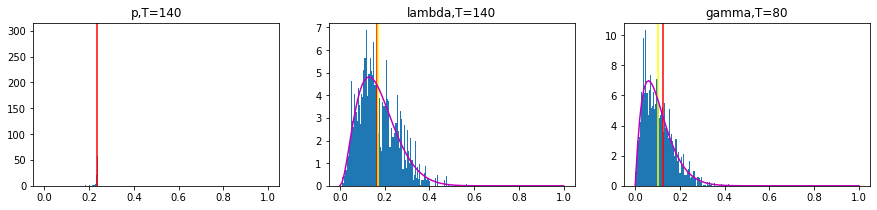

In [17]:
p_140=[]
l_140=[]
g_140=[]
for i in range (K):
    p_140.append(Belief[140][i][0])
    l_140.append(Belief[140][i][1])
    g_140.append(Belief[140][i][2])

#print(y)
#beta_fit testing for T=140
a1_140,b1_140=beta.fit(p_140,floc=0,fscale=1)[0:2]
a2_140,b2_140=beta.fit(l_140,floc=0,fscale=1)[0:2]
a3_140,b3_140=beta.fit(g_140,floc=0,fscale=1)[0:2]
print(a1_140,b1_140)
print(a2_140,b2_140)
print(a3_140,b3_140)

    
x=np.linspace(0,1,101)
fig,axs = plt.subplots(1, 3,figsize=(15,3))
axs[0].hist(p_140,bins=400,density=True,range=(0,1))
axs[0].axvline(P[140],color="red")
#axs[0].axvline(a1_140/(a1_140+b1_140),color="yellow")
#axs[0].plot(x,beta.pdf(x,a1_80,b1_80),color="m")
axs[0].set_title("p,T=140")
axs[1].hist(l_140,bins=200,density=True,range=(0,1))
axs[1].axvline(l0,color="red")
axs[1].axvline(a2_140/(a2_140+b2_140),color="yellow")
axs[1].plot(x,beta.pdf(x,a2_140,b2_140),color="m")
axs[1].set_title("lambda,T=140")
axs[2].hist(g_140,bins=200,density=True,range=(0,1))
axs[2].axvline(g0,color="red")
axs[2].axvline(a3_140/(a3_140+b3_140),color="yellow")
axs[2].plot(x,beta.pdf(x,a3_140,b3_140),color="m")
axs[2].set_title("gamma,T=80")


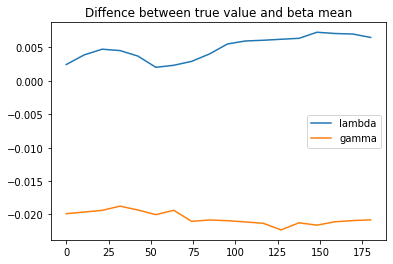

In [19]:
x=np.linspace(0,180,18)
y_l=[]
y_g=[]
for i in range(0,T,10):
    pi=[]
    li=[]
    gi=[]
    for j in range (K):
        pi.append(Belief[i][j][0])
        li.append(Belief[i][j][1])
        gi.append(Belief[i][j][2])
    a1_i,b1_i=beta.fit(pi,floc=0,fscale=1)[0:2]
    a2_i,b2_i=beta.fit(li,floc=0,fscale=1)[0:2]
    a3_i,b3_i=beta.fit(gi,floc=0,fscale=1)[0:2]    
    y_l.append(a2_i/(a2_i+b2_i)-l0)
    y_g.append(a3_i/(a3_i+b3_i)-g0)
    
plt.plot(x,y_l)
plt.plot(x,y_g)
plt.title("Diffence between true value and beta mean")
plt.legend(["lambda","gamma"])